<a href="https://colab.research.google.com/github/preetikhullbe/Credit-Card-Fraud-Detection/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.duplicated().sum()

1081

In [8]:
df.drop_duplicates(inplace=True,keep='first')

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

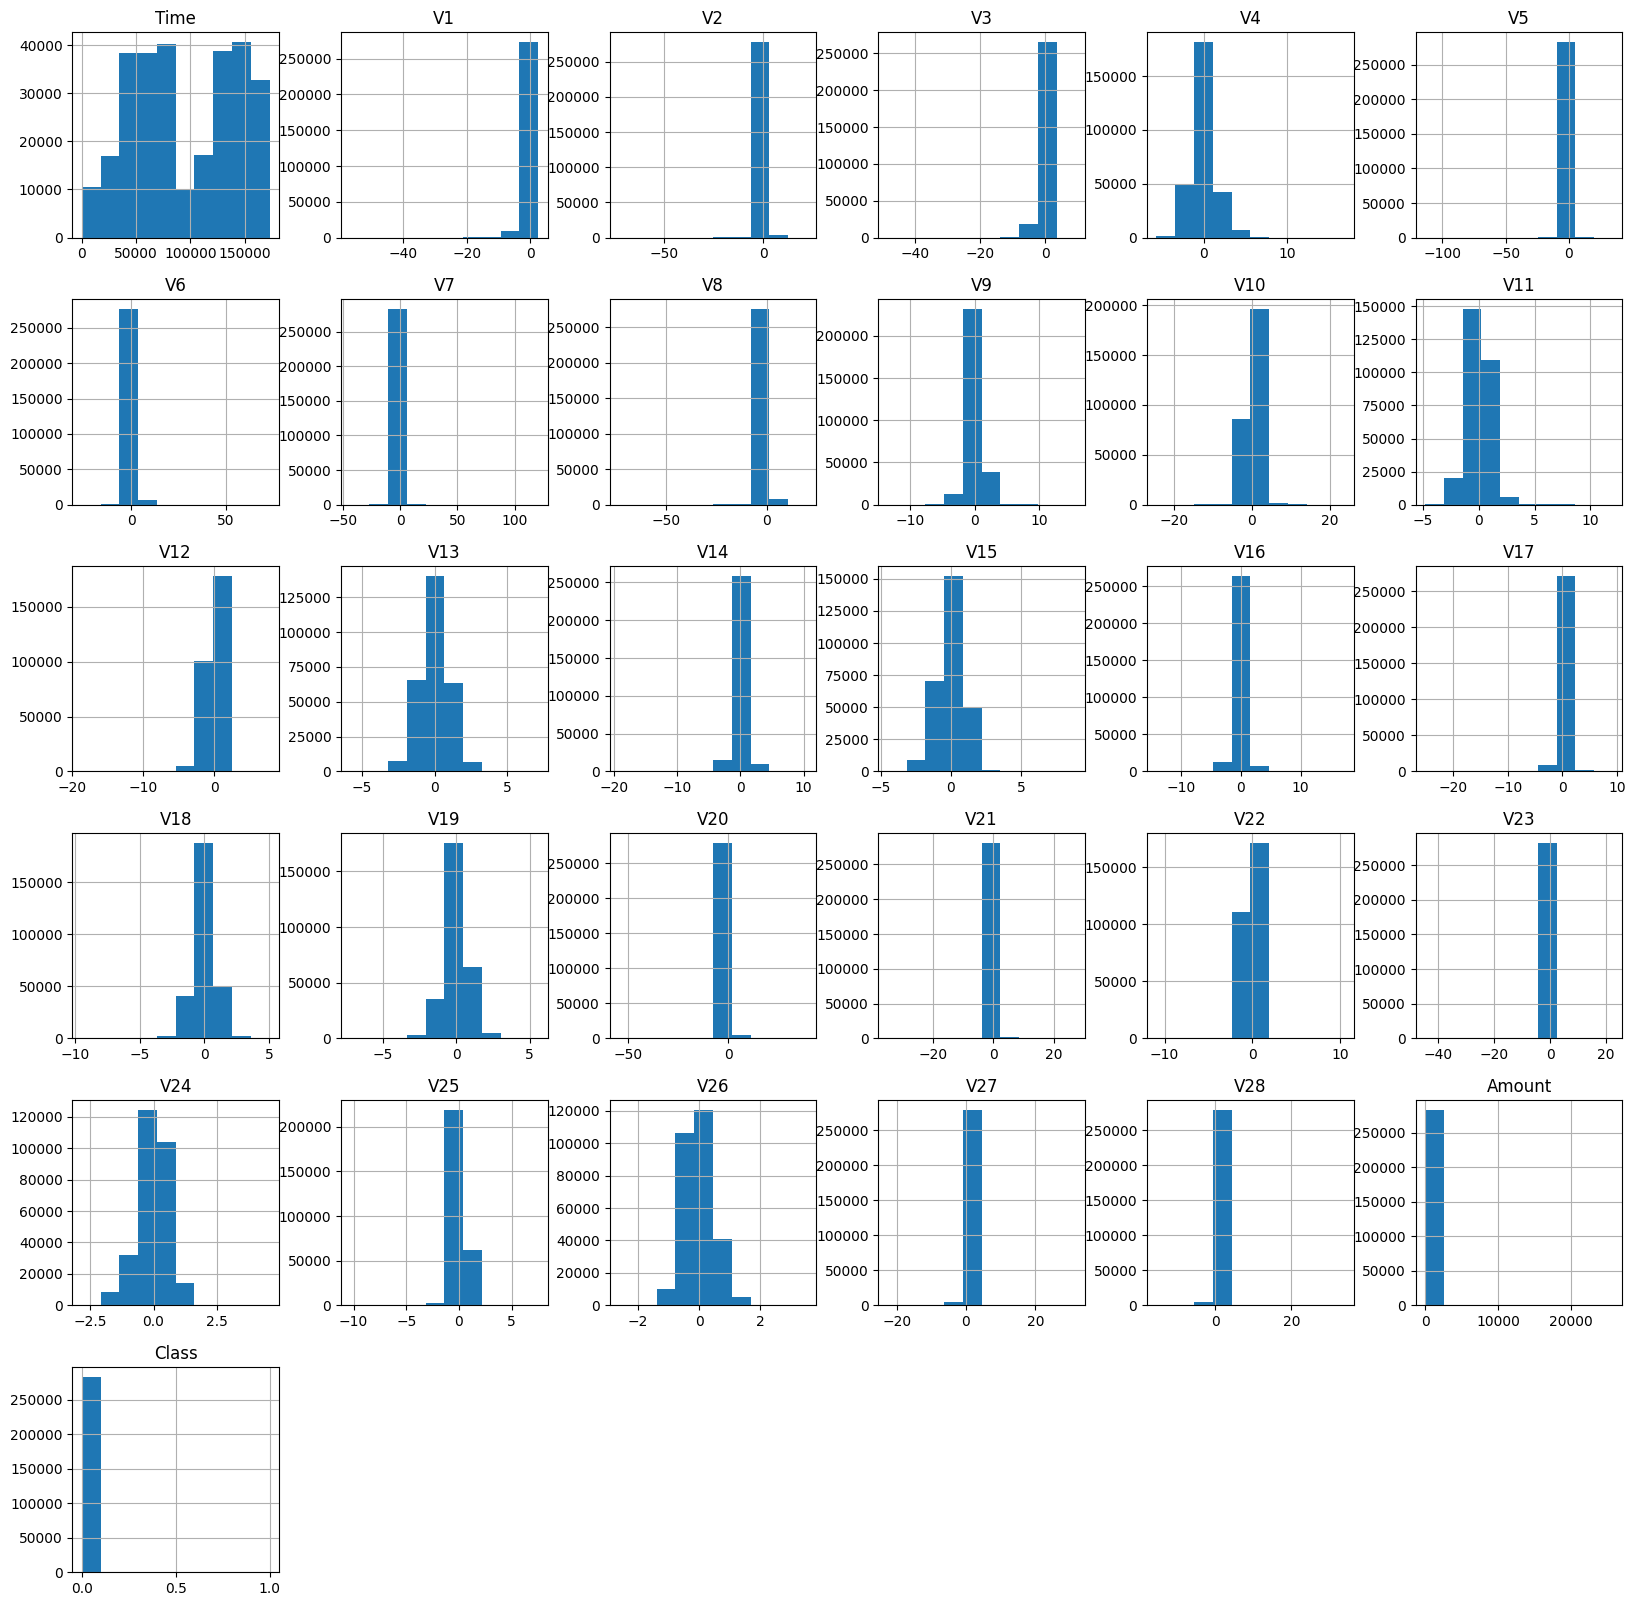

In [10]:
#EDA
df.hist(figsize=(20,20))
plt.show()

In [12]:
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)


0.0016698852262818046


In [14]:
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

Fraud Cases: 473
Valid Transactions: 283253


<function matplotlib.pyplot.show(close=None, block=None)>

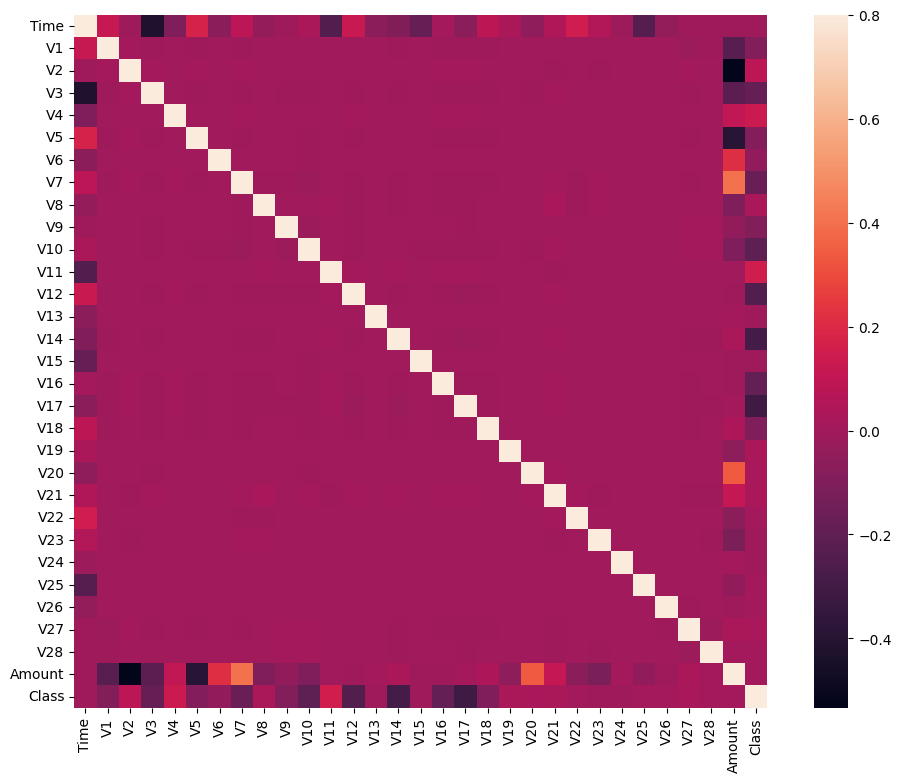

In [21]:
# Correlation matrix
plt.figure(figsize = (12, 9))
sns.heatmap(df.corr(), vmax = .8, square = True)
plt.show

In [23]:
# Get all the columns from the dataFrame
columns = df.columns.tolist()

In [24]:
target ="Class"

X = df[columns]
Y = df[target]

# Print shapes
print(X.shape)
print(Y.shape)

(283726, 31)
(283726,)


In [49]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


In [26]:
# define random states
state = 2

In [35]:
# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)



<Figure size 900x700 with 0 Axes>

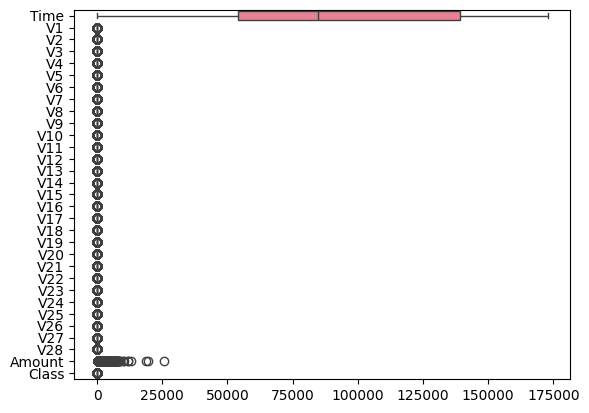

In [32]:
sns.boxplot( data = df, orient="h")

# display
plt.show()

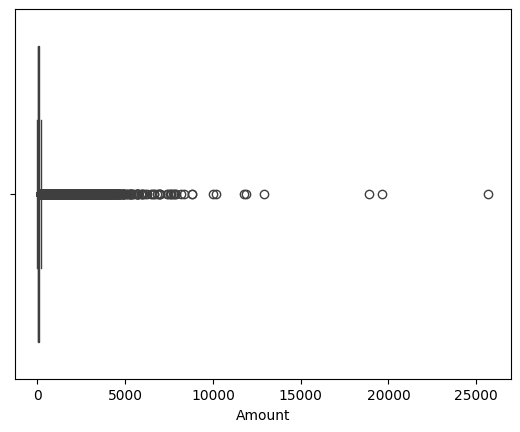

In [34]:
sns.boxplot( data = df['Amount'], orient="h")

# display
plt.show()

In [37]:
fraud=df[df['Class']==1]
genuine=df[df['Class']==0]

In [38]:
fraud['Amount'].describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [39]:
genuine['Amount'].describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

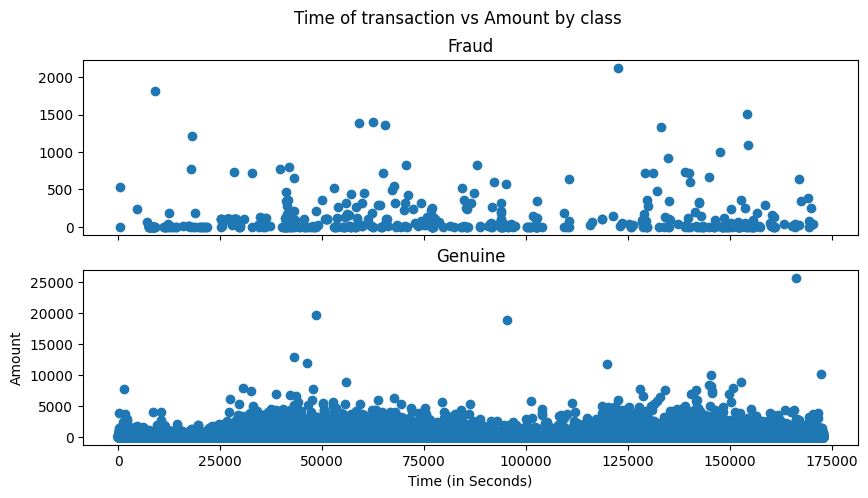

In [41]:
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 10, 5
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [43]:
X=df.drop(['Class'],axis=1)

In [44]:
y=df['Class']

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

In [47]:
rfc=RandomForestClassifier()

In [48]:
model=rfc.fit(X_train,y_train)
prediction=model.predict(X_test)
accuracy_score(y_test,prediction)

0.9995418125425879

In [51]:
print(recall_score(y_test,prediction))
print(precision_score(y_test,prediction))

0.7785234899328859
0.9508196721311475


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score

In [53]:
# Initialize classifiers
Lgr = LogisticRegression(solver='liblinear')
svc = SVC(kernel='sigmoid', gamma=1.0)
dtc = DecisionTreeClassifier(max_depth=5)
mnb = MultinomialNB()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
extc=ExtraTreesClassifier(n_estimators=50, random_state=2)

In [56]:
# Dictionary of classifiers
clfs = {
    'Logistic Regression': Lgr,
    'Support Vector Classifier': svc,
    'Decision Tree Classifier': dtc,
    'K-Nearest Neighbors': knn,
    'Random Forest Classifier': rfc,
    'XGBoost Classifier': xgb,
    'Gradient Boosting Classifier': gbc,
    'Extra Tree Classifier': extc
}

In [57]:
# Function to train classifiers
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

# Lists to store accuracy and precision
accuracy_l = []
precision_l = []

# Loop through classifiers
results=[]
for name, clf in clfs.items():
    accu, prec = train_classifier(clf, X_train, y_train, X_test, y_test)
   # print(f'Accuracy of {name} is {accu}')
    #print(f'Precision of {name} is {prec}')
    accuracy_l.append(accu)
    precision_l.append(prec)
    results.append({
      'Model': name,
      'Accuracy': accu,
      'Precision': prec
    })

In [58]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

                          Model  Accuracy  Precision
0           Logistic Regression  0.999060   0.748201
1     Support Vector Classifier  0.998249   0.000000
2      Decision Tree Classifier  0.999413   0.923077
3           K-Nearest Neighbors  0.998273   1.000000
4      Random Forest Classifier  0.999518   0.942623
5            XGBoost Classifier  0.999589   0.952381
6  Gradient Boosting Classifier  0.999166   0.786765
7         Extra Tree Classifier  0.999577   0.966942


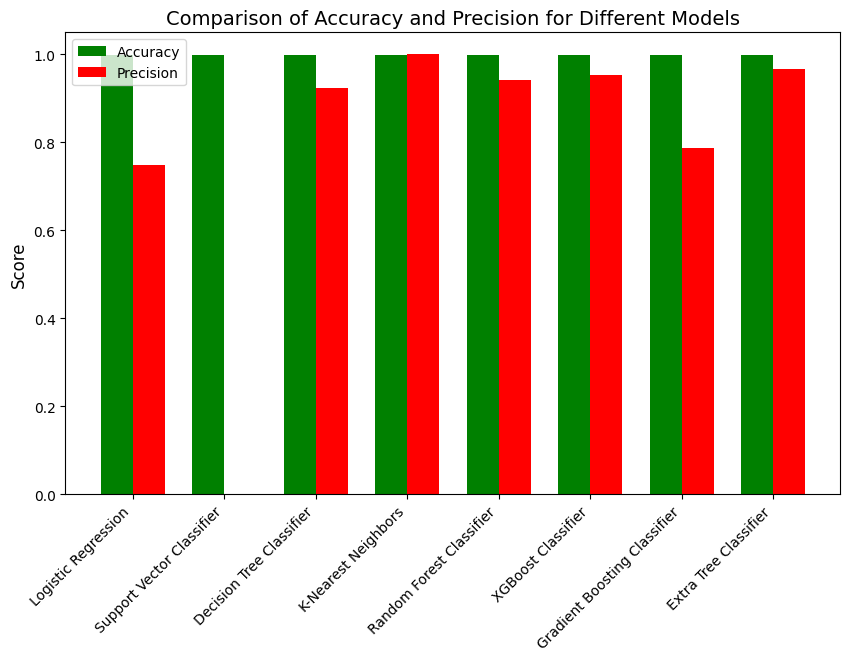

In [59]:
# Create a bar plot with grouped bars
bar_width = 0.35
x_pos = np.arange(len(results_df))

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x_pos, results_df['Accuracy'], bar_width, label='Accuracy', color='green')
rects2 = ax.bar(x_pos + bar_width, results_df['Precision'], bar_width, label='Precision', color='red')

# Add x-axis labels
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')

# Add labels and title
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparison of Accuracy and Precision for Different Models', fontsize=14)

# Add legend
ax.legend(loc='upper left', fontsize=10)

# Show the plot
plt.show()